In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv(r"D:\SEM-5\ML-LAB\ex2\Rice_sample.csv")
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,5654,284.530,112.1127,64.7956,0.8161,84.8463,0.9855,5737,0.6678,1.7303,...,103.3786,65.9093,57.1339,95.0612,70.0233,62.8685,0.2933,0.2975,0.4094,Karacadag
695,8218,353.773,144.1631,73.2066,0.8615,102.2912,0.9823,8366,0.7926,1.9693,...,109.3752,64.2564,62.2130,100.2736,65.3812,63.5629,0.3273,0.3419,0.3934,Arborio
696,9337,495.560,240.6346,50.5074,0.9777,109.0332,0.9745,9581,0.3339,4.7643,...,114.3316,64.9988,60.4123,105.1411,67.1471,63.4222,0.3691,0.3817,0.4645,Basmati
697,11604,428.668,177.7719,83.5838,0.8826,121.5511,0.9818,11819,0.6868,2.1269,...,120.6817,63.7702,65.9376,110.7530,62.2842,64.6196,0.4113,0.4351,0.4472,Ipsala


In [4]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
arr=ms.fit_transform(df.iloc[:,:-1])
arr

array([[0.22788728, 0.62519266, 0.77650678, ..., 0.70921986, 0.6752809 ,
        0.83968201],
       [0.20329044, 0.25545429, 0.2580097 , ..., 0.44956659, 0.43220974,
        0.47797284],
       [0.00952924, 0.15597755, 0.28444177, ..., 0.535855  , 0.54494382,
        0.74527989],
       ...,
       [0.3526633 , 0.84456284, 1.        , ..., 0.71631206, 0.68426966,
        0.81053329],
       [0.53730249, 0.59000285, 0.54404499, ..., 0.88258471, 0.88426966,
        0.75322955],
       [0.03070533, 0.17490629, 0.30215478, ..., 0.57722616, 0.55505618,
        0.65816496]])

In [5]:
df1=pd.DataFrame(arr,columns=df.columns[:-1])
df1['CLASS']=df['CLASS']
df1

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,0.227887,0.625193,0.776507,0.135950,0.973482,0.289657,0.707889,0.225999,0.076656,0.770314,...,0.725818,0.749147,0.299160,0.733851,0.707836,0.661287,0.709220,0.675281,0.839682,Basmati
1,0.203290,0.255454,0.258010,0.470118,0.621086,0.261226,0.462687,0.208687,0.640628,0.161878,...,0.498313,0.650663,0.497443,0.498139,0.506677,0.725590,0.449567,0.432210,0.477973,Arborio
2,0.009529,0.155978,0.284442,0.113840,0.881470,0.013539,0.592751,0.010482,0.298047,0.433797,...,0.608402,0.405171,0.234193,0.598028,0.802142,0.243825,0.535855,0.544944,0.745280,Jasmine
3,0.242955,0.622034,0.715704,0.184995,0.953035,0.306802,0.460554,0.248789,0.574375,0.659050,...,0.795773,0.727231,0.349105,0.804432,0.660734,0.679393,0.790780,0.760300,0.896323,Basmati
4,0.197589,0.263583,0.272508,0.447927,0.653035,0.254555,0.827292,0.192329,0.525461,0.180014,...,0.554447,0.698817,0.432590,0.557904,0.564057,0.719756,0.516548,0.491760,0.573037,Arborio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.052696,0.041480,0.067806,0.392837,0.470607,0.073015,0.878465,0.047487,0.648111,0.098095,...,0.434431,0.869788,0.111857,0.445918,0.892202,0.633748,0.417652,0.368914,0.628023,Karacadag
695,0.261525,0.304987,0.300274,0.521652,0.615655,0.327661,0.810235,0.256253,0.875890,0.158974,...,0.599059,0.634720,0.497793,0.599157,0.493280,0.722982,0.551615,0.535206,0.575025,Arborio
696,0.352663,0.844563,1.000000,0.174013,0.986901,0.426075,0.643923,0.352736,0.038693,0.870931,...,0.735130,0.740301,0.360967,0.742256,0.645034,0.704901,0.716312,0.684270,0.810533,Basmati
697,0.537302,0.590003,0.544045,0.680579,0.683067,0.608801,0.799574,0.530453,0.682789,0.199119,...,0.909464,0.565575,0.780806,0.907240,0.227137,0.858773,0.882585,0.884270,0.753230,Ipsala


In [6]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df1['CLASS']=lc.fit_transform(df1['CLASS'])
df1

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,0.227887,0.625193,0.776507,0.135950,0.973482,0.289657,0.707889,0.225999,0.076656,0.770314,...,0.725818,0.749147,0.299160,0.733851,0.707836,0.661287,0.709220,0.675281,0.839682,1
1,0.203290,0.255454,0.258010,0.470118,0.621086,0.261226,0.462687,0.208687,0.640628,0.161878,...,0.498313,0.650663,0.497443,0.498139,0.506677,0.725590,0.449567,0.432210,0.477973,0
2,0.009529,0.155978,0.284442,0.113840,0.881470,0.013539,0.592751,0.010482,0.298047,0.433797,...,0.608402,0.405171,0.234193,0.598028,0.802142,0.243825,0.535855,0.544944,0.745280,3
3,0.242955,0.622034,0.715704,0.184995,0.953035,0.306802,0.460554,0.248789,0.574375,0.659050,...,0.795773,0.727231,0.349105,0.804432,0.660734,0.679393,0.790780,0.760300,0.896323,1
4,0.197589,0.263583,0.272508,0.447927,0.653035,0.254555,0.827292,0.192329,0.525461,0.180014,...,0.554447,0.698817,0.432590,0.557904,0.564057,0.719756,0.516548,0.491760,0.573037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.052696,0.041480,0.067806,0.392837,0.470607,0.073015,0.878465,0.047487,0.648111,0.098095,...,0.434431,0.869788,0.111857,0.445918,0.892202,0.633748,0.417652,0.368914,0.628023,4
695,0.261525,0.304987,0.300274,0.521652,0.615655,0.327661,0.810235,0.256253,0.875890,0.158974,...,0.599059,0.634720,0.497793,0.599157,0.493280,0.722982,0.551615,0.535206,0.575025,0
696,0.352663,0.844563,1.000000,0.174013,0.986901,0.426075,0.643923,0.352736,0.038693,0.870931,...,0.735130,0.740301,0.360967,0.742256,0.645034,0.704901,0.716312,0.684270,0.810533,1
697,0.537302,0.590003,0.544045,0.680579,0.683067,0.608801,0.799574,0.530453,0.682789,0.199119,...,0.909464,0.565575,0.780806,0.907240,0.227137,0.858773,0.882585,0.884270,0.753230,2


In [7]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]
y=to_categorical(y,num_classes=5)
y

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(559, 106)
(140, 106)


In [9]:
model=Sequential()

In [10]:
model.add(Dense(units=10,activation='relu',input_shape=(X_train.shape[1],)))

In [11]:
model.add(Dense(units=10,activation='relu'))

In [12]:
model.add(Dense(units=5,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(X_train,y_train,epochs=20,batch_size=30,validation_split=0.25)

Epoch 1/20
14/14 [==============================] - 2s 40ms/step - loss: 1.5562 - accuracy: 0.3914 - val_loss: 1.5044 - val_accuracy: 0.5786
Epoch 2/20
14/14 [==============================] - 0s 8ms/step - loss: 1.4874 - accuracy: 0.5465 - val_loss: 1.4512 - val_accuracy: 0.6000
Epoch 3/20
14/14 [==============================] - 0s 9ms/step - loss: 1.4242 - accuracy: 0.5609 - val_loss: 1.3885 - val_accuracy: 0.5714
Epoch 4/20
14/14 [==============================] - 0s 8ms/step - loss: 1.3525 - accuracy: 0.5823 - val_loss: 1.3139 - val_accuracy: 0.5214
Epoch 5/20
14/14 [==============================] - 0s 7ms/step - loss: 1.2669 - accuracy: 0.6181 - val_loss: 1.2279 - val_accuracy: 0.5571
Epoch 6/20
14/14 [==============================] - 0s 8ms/step - loss: 1.1735 - accuracy: 0.6492 - val_loss: 1.1353 - val_accuracy: 0.6714
Epoch 7/20
14/14 [==============================] - 0s 8ms/step - loss: 1.0744 - accuracy: 0.7112 - val_loss: 1.0405 - val_accuracy: 0.6571
Epoch 8/20
14/14 [=

In [15]:
loss,accu=model.evaluate(X_test,y_test)
print("Loss ",loss)
print("Accuracy ",accu)

5/5 [==============================] - 0s 4ms/step - loss: 0.3674 - accuracy: 0.9786
Loss  0.3674323260784149
Accuracy  0.9785714149475098


In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1070      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,235
Trainable params: 1,235
Non-trainable params: 0
_________________________________________________________________
None


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


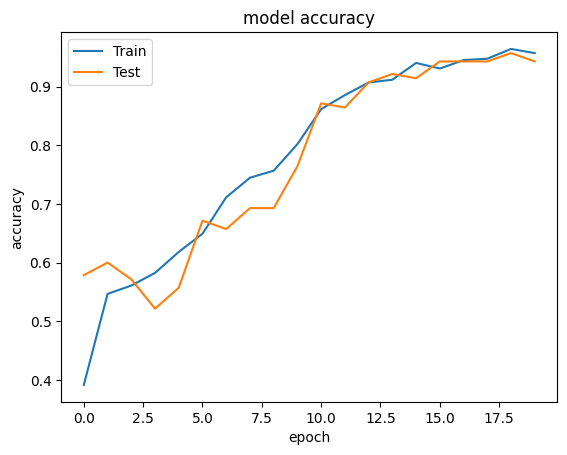

In [17]:
import matplotlib.pyplot as plt
print(history.history.keys())

epochs=[i for i in range(1,21)]
# summarize history for accuracy
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

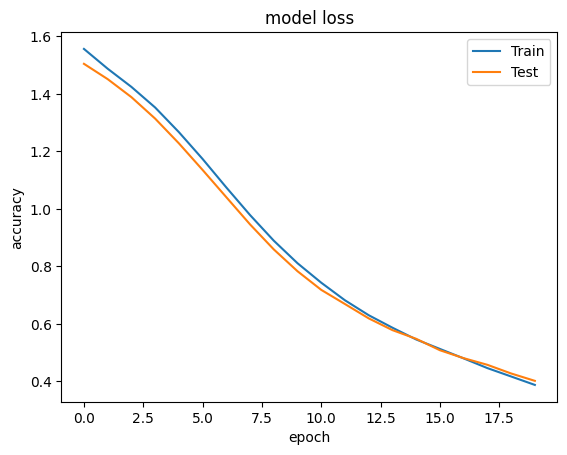

In [18]:

epochs=[i for i in range(1,21)]
# summarize history for accuracy
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')

plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()